In [2]:
from sympy import*
from dtumathtools import*
scipy import*
init_printing()

SyntaxError: invalid syntax (757624661.py, line 3)

In [3]:
#1A grundflade areal
from sympy import *

# Define variables and vector function
u,v = symbols('u,v')
a = Rational(213, 2)
b = Rational(144, 2)
c = Matrix([u*a*cos(v),u*b*sin(v)])


# Compute determinant of Jacobian matrix
du = c.diff(u)
dv = c.diff(v)
J = Matrix.hstack(du, dv)
Det = J.det().simplify()


# Evaluate integral
integral = integrate(Det, (u, 0, 1), (v, 0, 2*pi))

integral

ModuleNotFoundError: No module named 'sympy'

In [17]:
#1A rumfang
from sympy import *

# Define variables and vector function
a = Rational(213, 2)
b = Rational(144, 2)
c = 46
u, v, w = symbols('u v w')
e = Matrix([u*a*sin(v)*cos(w), u*b*sin(v)*sin(w), u*c*cos(v)])

# Compute determinant of Jacobian matrix
du = e.diff(u)
dv = e.diff(v)
dw = e.diff(w)
J = Matrix.hstack(du, dv, dw)
Det = J.det().simplify()

# Evaluate integral
integral = integrate(Det, (u, 0, 1), (v, 0, pi/2), (w, 0, 2*pi))

integral

In [25]:
from sympy import *
import scipy.integrate

# Define variables and vector function
a = Rational(213, 2)
b = Rational(144, 2)
c = 46
u, v, w = symbols('u v w')
e = Matrix([a*sin(v)*cos(w), b*sin(v)*sin(w), c*cos(v)])

# Compute determinant of Jacobian matrix
dv = e.diff(v)
dw = e.diff(w)
J = Matrix.hstack(dv, dw)
jacobi = J[:,0].cross(J[:,1]).norm().simplify()

# Convert to a callable function and integrate
f = lambdify((v, w), jacobi, 'scipy')
integral = scipy.integrate.dblquad(f, 0, pi/2, lambda x: 0, lambda x: 2*pi)

integral[0]




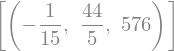

In [56]:
#2A
from sympy import *

a, b, c, z = symbols('a b c z')
f = Function('f')(z)
f = sqrt(a*z**2 + b*z + c)

# Define equations
eq1 = Eq(f.subs(z, 0), 24) # radius at the bottom is 24 meters
eq2 = Eq(f.subs(z, 180), 0) # height of the building is 180 meters
eq3 = Eq(diff(f, z).subs(z, 66), 0) # maximum width is at height 66 meters

# Define function f and solve for a, b, and c

sol = solve([eq1, eq2, eq3], (a, b, c))

# Print solution
sol


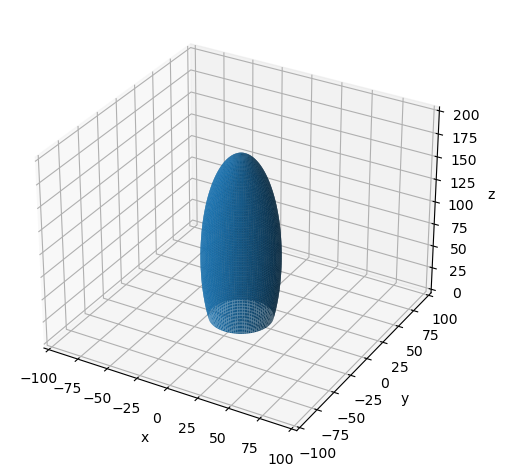

Matrix([
[sqrt(-u**2/15 + 44*u/5 + 576)*cos(v)],
[sqrt(-u**2/15 + 44*u/5 + 576)*sin(v)],
[                                   u]])

In [2]:
from sympy import *
from dtumathtools import*
#2B 
v,u = symbols('v,u')

Q = Matrix([[cos(v),-sin(v),0],[sin(v),cos(v),0],[0,0,1]])
g = sqrt(-Rational(1,15)*u**2+Rational(44,5)*u+576)

r = Q*Matrix([g,0,u])
plot = dtuplot.plot3d_parametric_surface(r[0],r[1],r[2], (v,0,2*pi),(u,0,180),xlim=(-100,100),ylim=(-100,100),zlim=(0,200))
display(r,plot)

In [5]:
#2C
from sympy import *
import scipy.integrate

Q = Matrix([[cos(v),-sin(v),0],[sin(v),cos(v),0],[0,0,1]])
g = sqrt(-Rational(1,15)*u**2+Rational(44,5)*u+576)
r = Q*Matrix([g,0,u])

dv = r.diff(v)
du = r.diff(u)
J = Matrix.hstack(dv, du)
jacobi = J[:,0].cross(J[:,1]).norm().simplify()

# Convert to a callable function and integrate
f = lambdify((u, v), jacobi, 'scipy')
integral = scipy.integrate.dblquad(f, 0, 180, 0,2*pi)

integral[0]

28166.98036231985

In [13]:
#3A

from sympy import*
from dtumathtools import*
u,v,w = symbols('u,v,w')



e = Matrix([u*cos(w)+v*sin(w),-u*sin(w)+v*cos(w),100*sin(w)])

dv = e.diff(v)
du = e.diff(u)
dw = e.diff(w)

jacobi = Matrix.hstack(du,dv,dw).det().simplify()

sol = integrate(jacobi,(u,-10,10),(v,-10,10),(w,0,pi/2))

display(e,sol)

Matrix([
[ u*cos(w) + v*sin(w)],
[-u*sin(w) + v*cos(w)],
[          100*sin(w)]])

40000

In [17]:
#3B/C

from sympy import*
from dtumathtools import*
u,v,w = symbols('u,v,w')



e = Matrix([-10*cos(w)+v*sin(w),10*sin(w)+v*cos(w),100*sin(w)])

dv = e.diff(v)
dw = e.diff(w)

g = Matrix.hstack(dv,dw)


jacobi = g[:,0].cross(g[:,1]).norm().simplify()

f = lambdify((v,w), jacobi, 'scipy')
area = scipy.integrate.dblquad(f, -10,10,0,pi/2)

area[0],area[0]*4

/Users/augustpilehave/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(2056.3667466826737, 8225.466986730695)